In [ ]:
Выбранный датасет - "Car information dataset" https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
Этот набор данных содержит исчерпывающую информацию об автомобилях 70-х - 80-х годов.
Предметная область: Информация об автомабилях с описанием их характеристик.
Источник данных: данные об автомобилях 70-х - 80-х годов.
Характер данных: реальные.
Атрибуты представленные в датасете:
Имя: уникальный идентификатор для каждого автомобиля.(тип данных - строковый)
Миль на галлон: топливная экономичность, измеряемая в милях на галлон (1 миля = 1,61 км, 1 галлон = 4,55 литров).(тип данных - числовой)
Цилиндры: количество цилиндров в двигателе.(тип данных - числовой)
Объем двигателя: объем двигателя с указанием его размера или мощности.(тип данных - числовой)
Лошадиные силы: выходная мощность двигателя.(тип данных - числовой)
Вес: вес автомобиля.(тип данных - числовой)
Ускорение: возможность увеличить скорость, измеряемая в секундах.(тип данных - числовой)
Модельный год: год выпуска модели автомобиля.(тип данных - числовой)
Происхождение: страна или регион происхождения каждого автомобиля.(тип данных - строковый)
Описание задачи анализа: с помощью анализа данных можно предположить какие автомобили и характеристики были распространены в 70-х - 80-х годах.

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2 

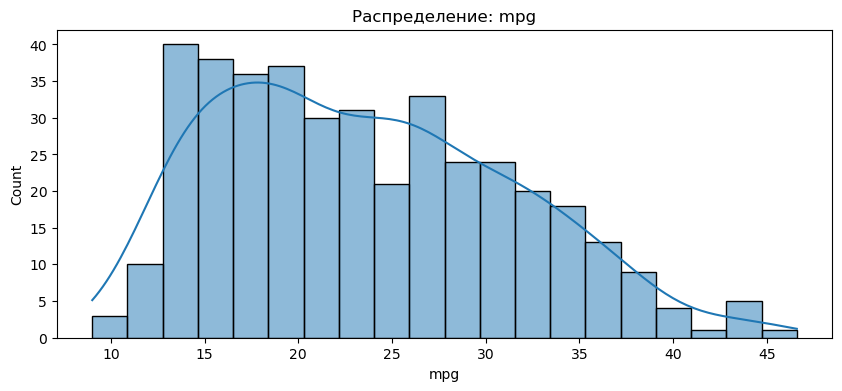

Выбросы в mpg: 1

Анализ признака: cylinders
Среднее значение: 5.454773869346734
Стандартное отклонение: 1.7010042445332094
Пропущенные значения: 0


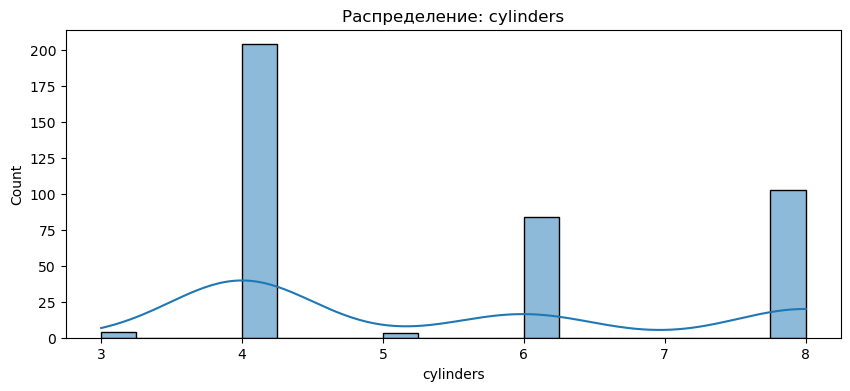

Выбросы в cylinders: 0

Анализ признака: displacement
Среднее значение: 193.42587939698493
Стандартное отклонение: 104.26983817119581
Пропущенные значения: 0


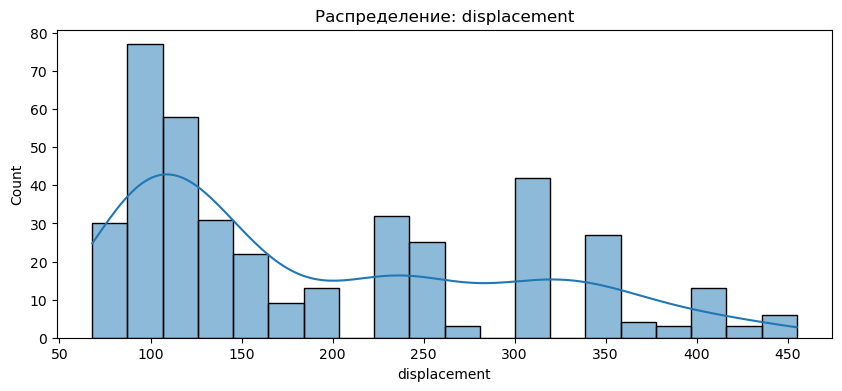

Выбросы в displacement: 0

Анализ признака: horsepower
Среднее значение: 104.46938775510205
Стандартное отклонение: 38.49115993282855
Пропущенные значения: 6
Предложение по обработке: заменить на среднее 104.46938775510205 или медиану 93.5


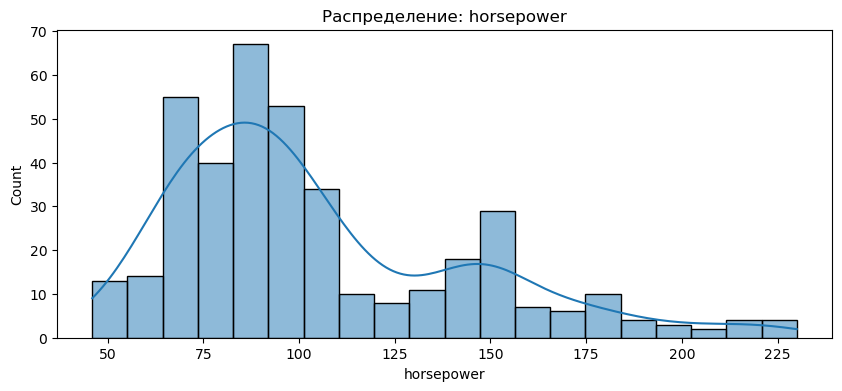

Выбросы в horsepower: 10

Анализ признака: weight
Среднее значение: 2970.424623115578
Стандартное отклонение: 846.8417741973271
Пропущенные значения: 0


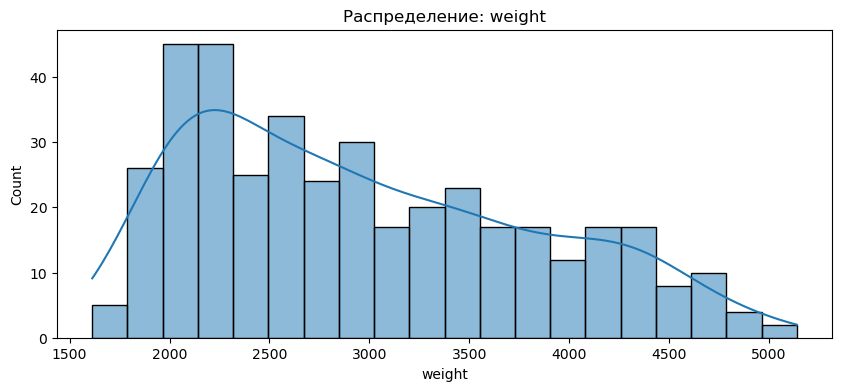

Выбросы в weight: 0

Анализ признака: acceleration
Среднее значение: 15.568090452261307
Стандартное отклонение: 2.7576889298126757
Пропущенные значения: 0


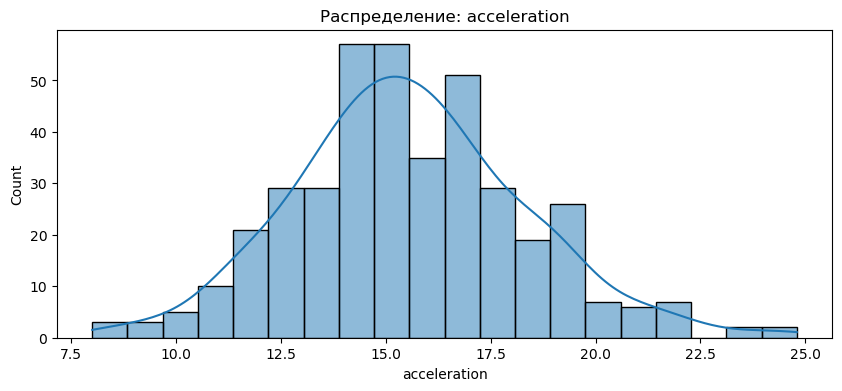

Выбросы в acceleration: 7

Анализ признака: model_year
Среднее значение: 76.01005025125629
Стандартное отклонение: 3.697626646732623
Пропущенные значения: 0


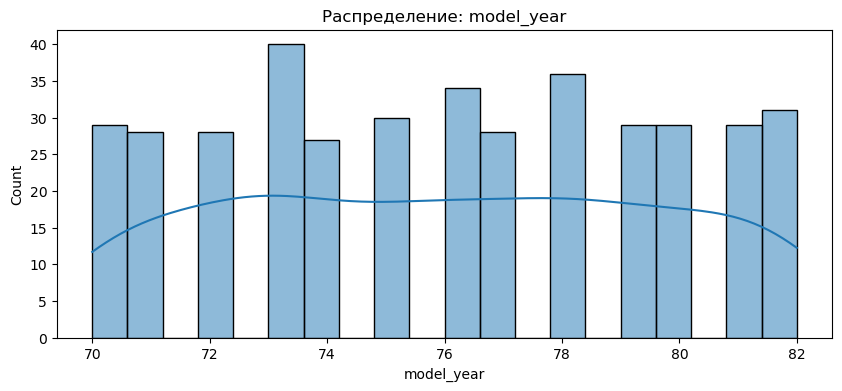

Выбросы в model_year: 0

Анализ признака: origin
Наиболее частое значение (мода): usa
Количество уникальных значений: 3
Пропущенные значения: 0


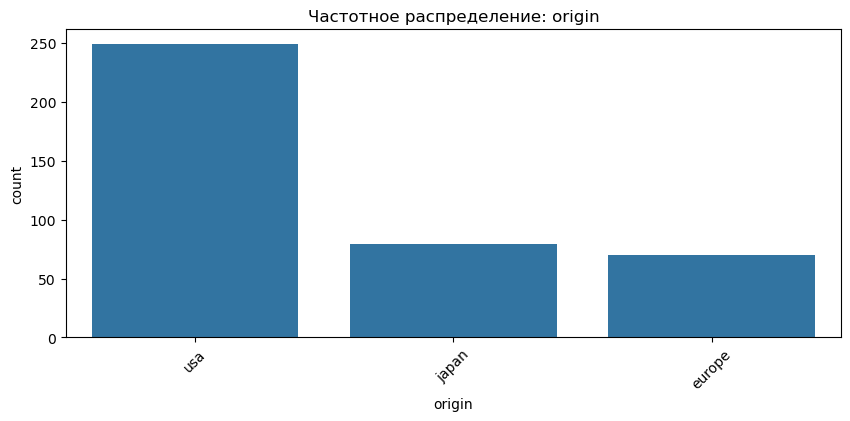

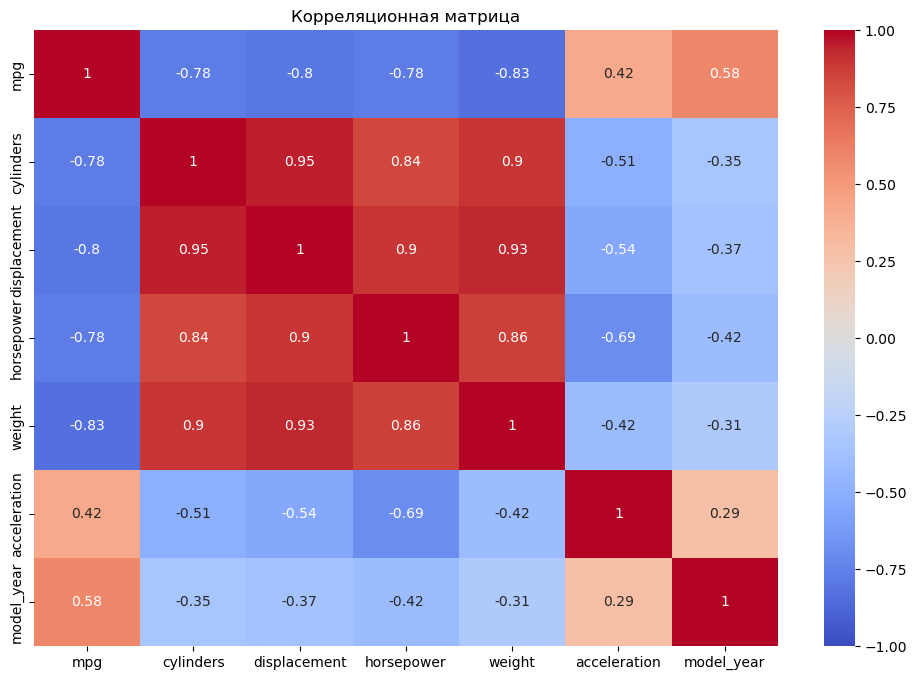

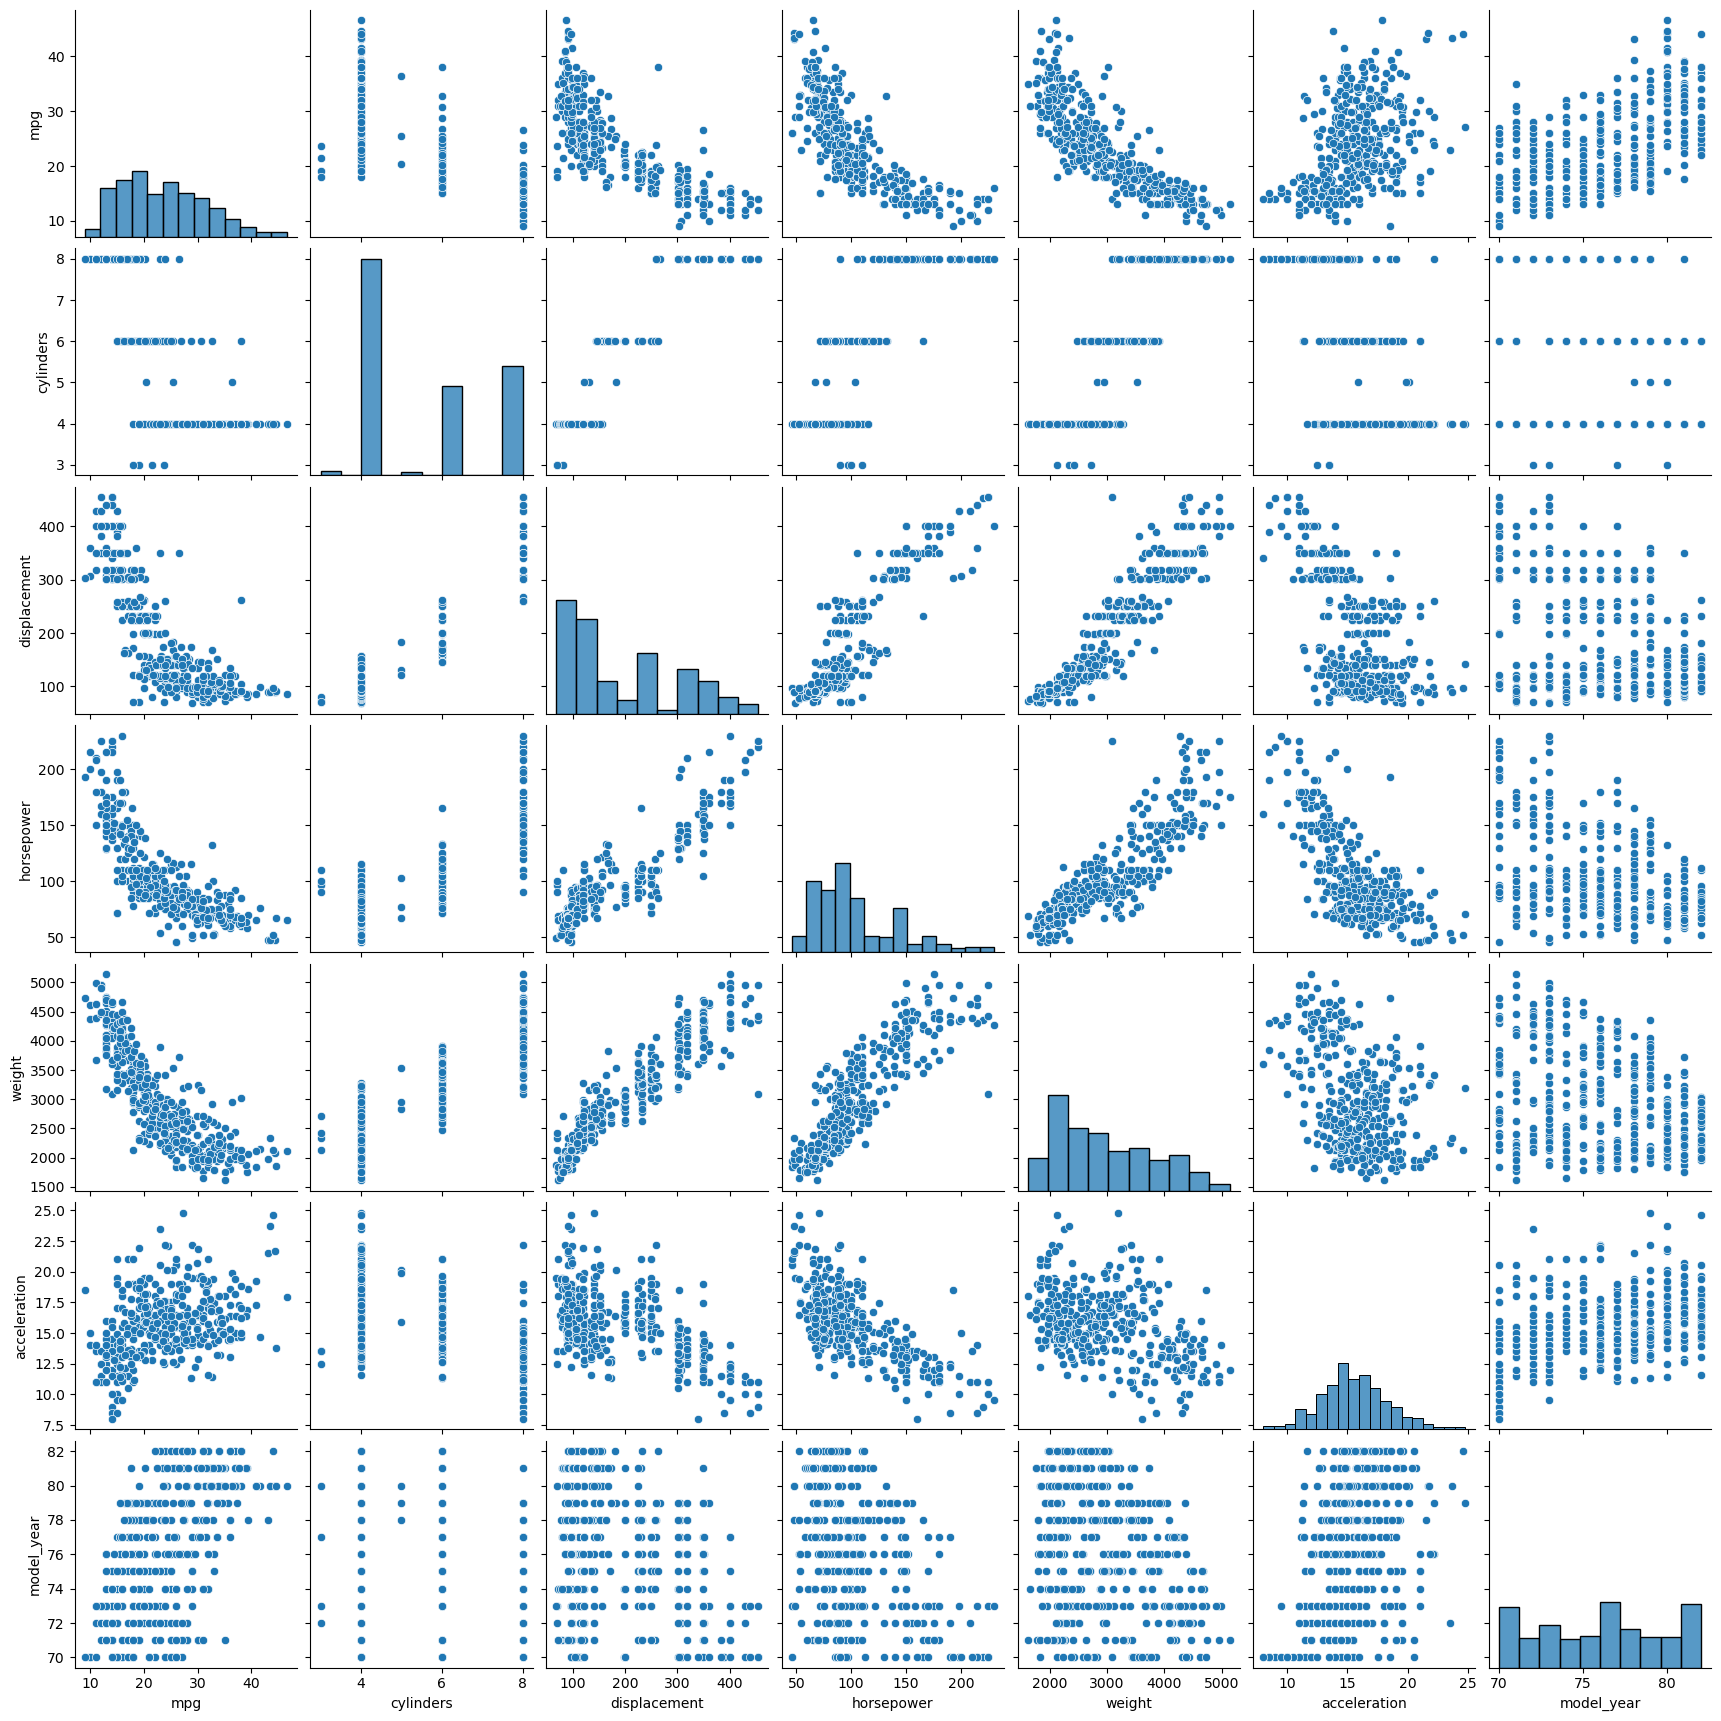


Высококоррелированные признаки:
cylinders и mpg: -0.7753962854205539
displacement и mpg: -0.8042028248058979
displacement и cylinders: 0.9507213901392415
horsepower и mpg: -0.7784267838977761
horsepower и cylinders: 0.8429833569186568
horsepower и displacement: 0.89725700184347
weight и mpg: -0.8317409332443344
weight и cylinders: 0.8960167954533944
weight и displacement: 0.932824146841634
weight и horsepower: 0.8645377375741455

Признаки с низкой корреляцией:


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

url = r"C:\Users\masha\Desktop\Automobile.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())

def analyze_feature(df):
    for column in df.columns:
        print(f"\nАнализ признака: {column}")
        
        if pd.api.types.is_numeric_dtype(df[column]):
            mean_val = df[column].mean()
            std_val = df[column].std()
            print(f"Среднее значение: {mean_val}")
            print(f"Стандартное отклонение: {std_val}")
            
            missing = df[column].isna().sum()
            print(f"Пропущенные значения: {missing}")
            if missing > 0:
                print(f"Предложение по обработке: заменить на среднее {mean_val} или медиану {df[column].median()}")
           
            plt.figure(figsize=(10, 4))
            sns.histplot(df[column], bins=20, kde=True)
            plt.title(f"Распределение: {column}")
            plt.show()
            
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            print(f"Выбросы в {column}: {outliers.shape[0]}")
        
        else:
            mode_val = df[column].mode()[0] if not df[column].mode().empty else 'Нет значений'
            unique_vals = df[column].nunique()
            print(f"Наиболее частое значение (мода): {mode_val}")
            print(f"Количество уникальных значений: {unique_vals}")
            
            missing = df[column].isna().sum()
            print(f"Пропущенные значения: {missing}")
            if missing > 0:
                print(f"Предложение по обработке: заменить на моду '{mode_val}'")
            
            if column == "origin":
                plt.figure(figsize=(10, 4))
                sns.countplot(x=df[column], order=df[column].value_counts().index)
                plt.title(f"Частотное распределение: {column}")
                plt.xticks(rotation=45)
                plt.show()

analyze_feature(df)

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

sns.pairplot(numeric_df)
plt.show()

def analyze_correlation(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    low_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            elif abs(corr_matrix.iloc[i, j]) < 0.2:
                low_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    print("\nВысококоррелированные признаки:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} и {pair[1]}: {pair[2]}")
    
    print("\nПризнаки с низкой корреляцией:")
    for pair in low_corr_pairs:
        print(f"{pair[0]} и {pair[1]}: {pair[2]}")

analyze_correlation(correlation_matrix)
